Computational Challenge 3 Group 1 Group Members : Thuyen, Michael, Triet and Manoj



Group 1: You will be implementing Yule process, where the number of births is proportional to the size
of the population, and a non-homogeneous perturbation of the process modeling, e.g. seasonal
variability in the birth rate:

In [1]:
#define functions
import numpy as np
import random
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.misc
import scipy.special
from matplotlib .lines import Line2D
from cycler import cycler
from numba import jit
from matplotlib.ticker import FuncFormatter

First part implementation Yule process with fixed rate mu=0.4 n. Run with 1000 subintervals.

Delta t is 0.1001
Running time is 3.91988 s


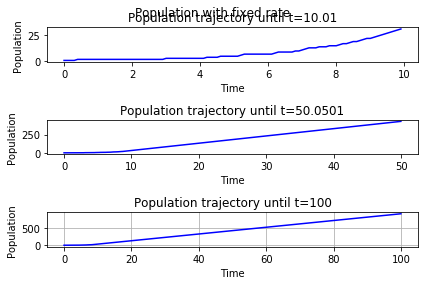

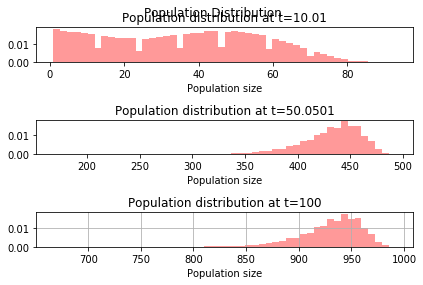

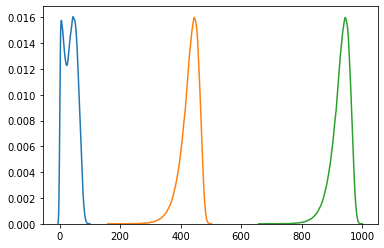

In [7]:
#First process linear with lambda:
import time
@jit
def v1(n,t):
    return 0.4*n

#applying markov chain for Yule process
@jit(nopython=True)
def markov_chain(input,p):
    x = random.uniform(0, 1)
    if x <= p:
        out_temp=1
    else:
        out_temp = 0
    return input+out_temp

#calculating the whole trajectory_case
@jit(nopython=True)
def trajectory(X0,v,t,deltat):
    X = np.zeros(len(t))
    X[0] = X0
    for i in range(len(t)-1):
        p = v(X[i],i*deltat)*deltat
        X[i+1] = markov_chain(X[i], p)
    return X


start = time.time()
#plot final population histogram
t = np.linspace(0,100,1000) # discretize the time steps
deltat = t[1]-t[0] #calculate delta t
print("Delta t is %g"%deltat)
num_X0 = 1
num_trials = 100000 #number of trials for plotting the population distribution
v = v1 # choose either process 1 or 2
X0 = 1 #initial pop

fig1, ax1 = plt.subplots(3, 1)

#plot trajectory
X = trajectory(X0,v,t,deltat)
divider = [10,2,1]
i=0
for row in ax1:
    row.plot(t[0:int(np.round(len(t)/divider[i]))], X[0:int(np.round(len(t)/divider[i]))], 'b')
    ax1[i].set_title('Population trajectory until t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax1[i].set_xlabel('Time')
    ax1[i].set_ylabel('Population')
    i=i+1
fig1.suptitle('Population with fixed rate')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_1.png')

#plot histograms
pop_10 = []
pop_50 = []
pop_100 = []
for k in range(num_trials):
    X = trajectory(X0,v,t,deltat)
    pop_10.append(X[int(np.round(len(t)/10))])
    pop_50.append(X[int(np.round(len(t) / 2))])
    pop_100.append(X[-1])

fig2, ax2 = plt.subplots(3, 1)
M = [pop_10,pop_50,pop_100]
divider = [10,2,1]
i=0
for row in ax2:
    row.hist(M[i],density=True,bins=50,alpha = 0.4,color = 'r',label='Histogram of Population at the end')
    ax2[i].set_title('Population distribution at t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax2[i].set_xlabel('Population size')
    i=i+1

fig2.suptitle('Population Distribution')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_2.png')
end = time.time()
print("Running time is %g s"%(end-start))
plt.show()
## kernel density estimation
sns.kdeplot(pop_10)
sns.kdeplot(pop_50)
sns.kdeplot(pop_100)

Run with 10000 subintervals.

Delta t is 0.010001
Running time is 16.8851 s


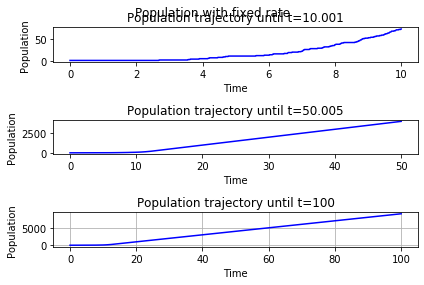

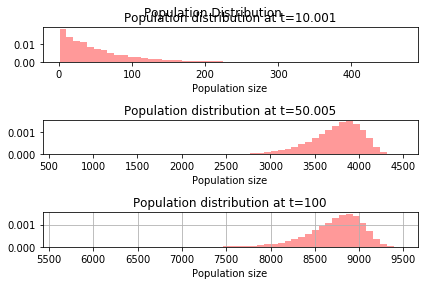

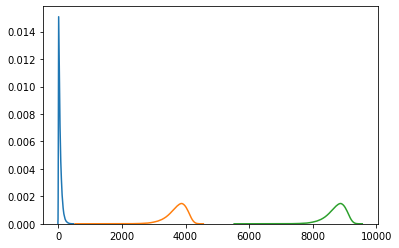

In [8]:
#First process linear with lambda: With 10000 subintervals
import time
@jit
def v1(n,t):
    return 0.4*n

#applying markov chain for Yule process
@jit(nopython=True)
def markov_chain(input,p):
    x = random.uniform(0, 1)
    if x <= p:
        out_temp=1
    else:
        out_temp = 0
    return input+out_temp

#calculating the whole trajectory_case
@jit(nopython=True)
def trajectory(X0,v,t,deltat):
    X = np.zeros(len(t))
    X[0] = X0
    for i in range(len(t)-1):
        p = v(X[i],i*deltat)*deltat
        X[i+1] = markov_chain(X[i], p)
    return X


start = time.time()
#plot final population histogram
t = np.linspace(0,100,10000) # discretize the time steps
deltat = t[1]-t[0] #calculate delta t
print("Delta t is %g"%deltat)
num_X0 = 1
num_trials = 100000 #number of trials for plotting the population distribution
v = v1 # choose either process 1 or 2
X0 = 1 #initial pop

fig1, ax1 = plt.subplots(3, 1)

#plot trajectory
X = trajectory(X0,v,t,deltat)
divider = [10,2,1]
i=0
for row in ax1:
    row.plot(t[0:int(np.round(len(t)/divider[i]))], X[0:int(np.round(len(t)/divider[i]))], 'b')
    ax1[i].set_title('Population trajectory until t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax1[i].set_xlabel('Time')
    ax1[i].set_ylabel('Population')
    i=i+1
fig1.suptitle('Population with fixed rate')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_1.png')

#plot histograms
pop_10 = []
pop_50 = []
pop_100 = []
for k in range(num_trials):
    X = trajectory(X0,v,t,deltat)
    pop_10.append(X[int(np.round(len(t)/10))])
    pop_50.append(X[int(np.round(len(t) / 2))])
    pop_100.append(X[-1])

fig2, ax2 = plt.subplots(3, 1)
M = [pop_10,pop_50,pop_100]
divider = [10,2,1]
i=0
for row in ax2:
    row.hist(M[i],density=True,bins=50,alpha = 0.4,color = 'r',label='Histogram of Population at the end')
    ax2[i].set_title('Population distribution at t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax2[i].set_xlabel('Population size')
    i=i+1

fig2.suptitle('Population Distribution')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_2.png')
end = time.time()
print("Running time is %g s"%(end-start))
plt.show()
## kernel density estimation
sns.kdeplot(pop_10)
sns.kdeplot(pop_50)
sns.kdeplot(pop_100)

Second Yule processes with seasonal variations: with 1000 sub intervals

Delta t is 0.1001
Running time is 4.47278 s


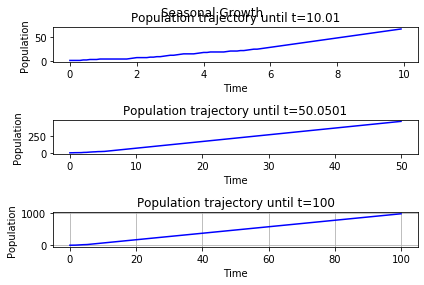

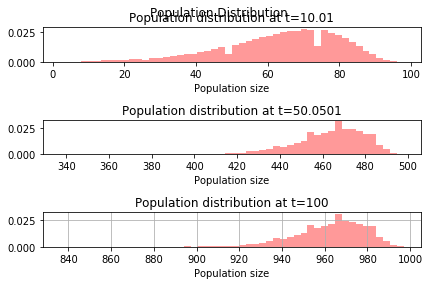

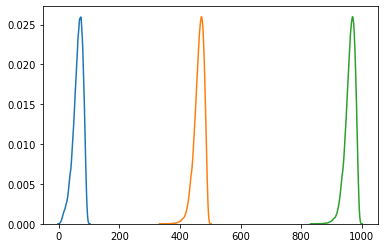

In [9]:
#Second Yule processes with seasonal variations: with 1000 sub intervals
import time
@jit
def v2(n,t):
    return 0.4*n +2*np.sin(t)

#applying markov chain for Yule process
@jit(nopython=True)
def markov_chain(input,p):
    x = random.uniform(0, 1)
    if x <= p:
        out_temp=1
    else:
        out_temp = 0
    return input+out_temp

#calculating the whole trajectory_case
@jit(nopython=True)
def trajectory(X0,v,t,deltat):
    X = np.zeros(len(t))
    X[0] = X0
    for i in range(len(t)-1):
        p = v(X[i],i*deltat)*deltat
        X[i+1] = markov_chain(X[i], p)
    return X


start = time.time()
#plot final population histogram
t = np.linspace(0,100,1000) # discretize the time steps
deltat = t[1]-t[0] #calculate delta t
print("Delta t is %g"%deltat)
num_X0 = 1
num_trials = 100000 #number of trials for plotting the population distribution
v = v2 # choose either process 1 or 2
X0 = 1 #initial pop

fig1, ax1 = plt.subplots(3, 1)

#plot trajectory
X = trajectory(X0,v,t,deltat)
divider = [10,2,1]
i=0
for row in ax1:
    row.plot(t[0:int(np.round(len(t)/divider[i]))], X[0:int(np.round(len(t)/divider[i]))], 'b')
    ax1[i].set_title('Population trajectory until t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax1[i].set_xlabel('Time')
    ax1[i].set_ylabel('Population')
    i=i+1
fig1.suptitle('Seasonal Growth')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_1.png')

#plot histograms
pop_10 = []
pop_50 = []
pop_100 = []
for k in range(num_trials):
    X = trajectory(X0,v,t,deltat)
    pop_10.append(X[int(np.round(len(t)/10))])
    pop_50.append(X[int(np.round(len(t) / 2))])
    pop_100.append(X[-1])

fig2, ax2 = plt.subplots(3, 1)
M = [pop_10,pop_50,pop_100]
divider = [10,2,1]
i=0
for row in ax2:
    row.hist(M[i],density=True,bins=50,alpha = 0.4,color = 'r',label='Histogram of Population at the end')
    ax2[i].set_title('Population distribution at t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax2[i].set_xlabel('Population size')
    i=i+1

fig2.suptitle('Population Distribution')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_2.png')
end = time.time()
print("Running time is %g s"%(end-start))
plt.show()
## kernel density estimation
sns.kdeplot(pop_10)
sns.kdeplot(pop_50)
sns.kdeplot(pop_100)

Seasonal variations: with 10000 sub intervals.

Delta t is 0.010001
Running time is 20.3544 s


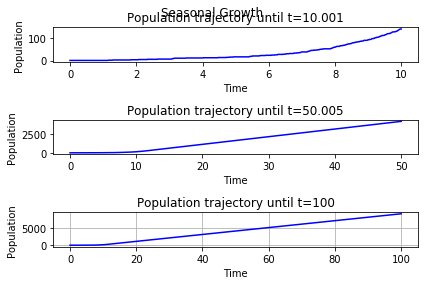

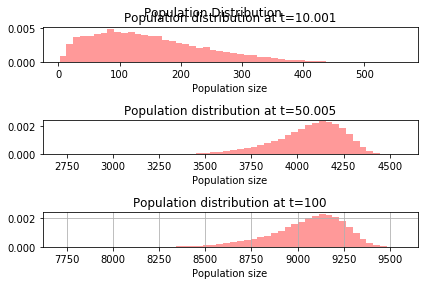

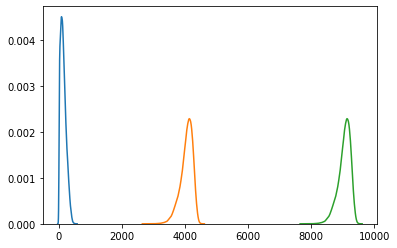

In [10]:
#Second Yule processes with seasonal variations: with 10000sub intervals
import time
@jit
def v2(n,t):
    return 0.4*n +2*np.sin(t)

#applying markov chain for Yule process
@jit(nopython=True)
def markov_chain(input,p):
    x = random.uniform(0, 1)
    if x <= p:
        out_temp=1
    else:
        out_temp = 0
    return input+out_temp

#calculating the whole trajectory_case
@jit(nopython=True)
def trajectory(X0,v,t,deltat):
    X = np.zeros(len(t))
    X[0] = X0
    for i in range(len(t)-1):
        p = v(X[i],i*deltat)*deltat
        X[i+1] = markov_chain(X[i], p)
    return X


start = time.time()
#plot final population histogram
t = np.linspace(0,100,10000) # discretize the time steps
deltat = t[1]-t[0] #calculate delta t
print("Delta t is %g"%deltat)
num_X0 = 1
num_trials = 100000 #number of trials for plotting the population distribution
v = v2 # choose either process 1 or 2
X0 = 1 #initial pop

fig1, ax1 = plt.subplots(3, 1)

#plot trajectory
X = trajectory(X0,v,t,deltat)
divider = [10,2,1]
i=0
for row in ax1:
    row.plot(t[0:int(np.round(len(t)/divider[i]))], X[0:int(np.round(len(t)/divider[i]))], 'b')
    ax1[i].set_title('Population trajectory until t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax1[i].set_xlabel('Time')
    ax1[i].set_ylabel('Population')
    i=i+1
fig1.suptitle('Seasonal Growth')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_1.png')

#plot histograms
pop_10 = []
pop_50 = []
pop_100 = []
for k in range(num_trials):
    X = trajectory(X0,v,t,deltat)
    pop_10.append(X[int(np.round(len(t)/10))])
    pop_50.append(X[int(np.round(len(t) / 2))])
    pop_100.append(X[-1])

fig2, ax2 = plt.subplots(3, 1)
M = [pop_10,pop_50,pop_100]
divider = [10,2,1]
i=0
for row in ax2:
    row.hist(M[i],density=True,bins=50,alpha = 0.4,color = 'r',label='Histogram of Population at the end')
    ax2[i].set_title('Population distribution at t=%g'%t[min(int(np.round(len(t)/divider[i])),len(t)-1)])
    ax2[i].set_xlabel('Population size')
    i=i+1

fig2.suptitle('Population Distribution')
plt.tight_layout()
plt.grid()
plt.savefig('challenge_3_2.png')
end = time.time()
print("Running time is %g s"%(end-start))
plt.show()
## kernel density estimation
sns.kdeplot(pop_10)
sns.kdeplot(pop_50)
sns.kdeplot(pop_100)

Comments: There was some problem understanding the discretization of time for Yule Process. So we simply took uniform discritiization of time 't'. Which might not work properly. The results presented here might not agree with the Yule Process, these are here for simply to understand the process.